# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:  Estefania Zapata Valderrama

Identificación: 1006373242

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [2]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial,pi,sqrt
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

In [3]:
def steffensen(f,x0,tol= 1e-10, maxiter= 100): #defino la funcion y sus valores de entrada
  '''
  La funcion steffensen recibe
  f = funcion a la cual queremos encontrarle la raiz
  x0 = un punto cercano a la raiz para empezar a evaluar
  tol = un valor de una tolerancia para evaluar la proximidad a la raiz
  maxiter = un numero maximo de iteraciones

  la funcion me retorna
  x1 = el valor x(n+1) para el cual se cumplio la tolerancia y esta es la aproximacion a la raiz de f(x) = 0
  n = el numero de iteraciones que se realizaron para alcanzar la toleracion
  '''
  n = 0 #inicio el contador de iteraciones en 0

  while True: #inicio un ciclo para hacer las iteraciones
    y0 = x0 + f(x0) #defino y0
    if f(y0) == f(x0): #utilizo un condicional para evaluar que estos valores no sean igual
      raise ValueError('f(y0) debe ser diferente a f(x0) para evitar division por cero') #si los valores son iguales marco un error

    x1 = (x0 - (f(x0)**2))/(f(y0)-f(x0)) #defino el termino n+1
    n += 1 #sumo 1 al contador de iteraciones

    if abs(x1-x0)< tol: #evaluo la condicion para definir mi resultado
      return x1,n #si se cumple la condicion para la tolerancia, devuelvo x1 y n

    else: x0 = x1 #si no se cumple la condicion, cambio el termino x0 por el siguiente

  raise RuntimeError(f'No se ha encontrado la raiz en {maxiter} iteraciones') #error si no se encuentra el valor en un maximo de iteraciones


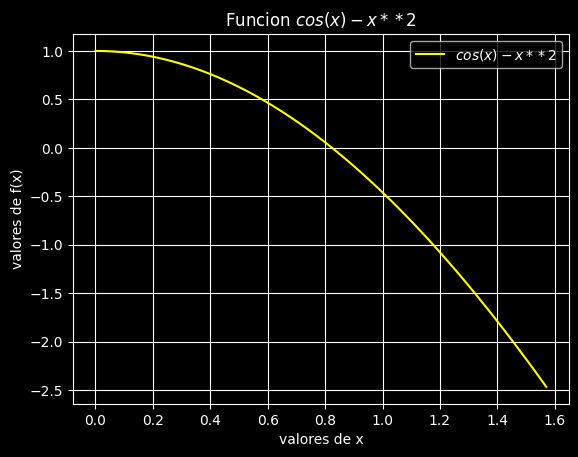

In [28]:
fx = lambda x: np.cos(x)-x**2 #defino funcion tipo lamba con f(x)=0
x = np.linspace(0, pi/2,100)
y = fx(x)

#Grafico de la funcion
plt.style.use('dark_background')
plt.plot(x,y,label='$cos(x)-x**2$',color = 'yellow')
plt.xlabel('valores de x')
plt.ylabel('valores de f(x)')
plt.title('Funcion $cos(x)-x**2$')
plt.grid()
plt.legend()
plt.show()

In [6]:
df = pd.DataFrame({'x': x, 'fx': y})  #Dataframe de los datos

#Busco el un valor cercano a 0 para elegir el punto x0
df.sorted = df.iloc[(df['fx']-0).abs().argsort()]
aprox = df.sorted.iloc[0]['x']
print(f'primera aproximacion a la raiz es: {aprox}')

primera aproximacion a la raiz: 0.8250647373064104


<ipython-input-6-0730a2d38f1b>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sorted = df.iloc[(df['fx']-0).abs().argsort()]


In [22]:
#Utilizo steffense,biseccion,secante para hallar las raices

raiz_aprox , n_terminos = steffensen(fx,0.82,tol=1e-3,maxiter=100)
print(f'Raiz de Cos(x)-x**2 usando el metodo de steffensen es: {raiz_aprox}')
raiz_biseccion = bisect(fx,0,1.5)
print(f'Raiz de Cos(x)-x**2 usando el metodo de la biseccion es: {raiz_biseccion}')
raiz_secante = newton(fx, x0=1.5, x1=1.3)
print(f'Raiz de Cos(x)-x**2 usando el metodo de la secante es: {raiz_secante}')

Raiz de Cos(x)-x**2 usando el metodo de steffensen es: 0.9709839978698762
Raiz de Cos(x)-x**2 usando el metodo de la biseccion es: 0.8241323123033908
Raiz de Cos(x)-x**2 usando el metodo de la secante es: 0.8241323123026507


Utilizando el metodo de steffensen se hace necesario conocer un punto muy cercano a la raiz de lo contrario se dificulta demasiado la convergencia, para esta situacion se llego a un valor muy cercano al real, comparandolo con los metodos de biseccion y secante.

Probando con tolerancia: 0.1
Probando con tolerancia: 0.027825594022071243
Probando con tolerancia: 0.007742636826811269
Probando con tolerancia: 0.002154434690031882
Probando con tolerancia: 0.0005994842503189409
Probando con tolerancia: 0.0001668100537200059
Probando con tolerancia: 4.641588833612772e-05
Probando con tolerancia: 1.2915496650148827e-05
Probando con tolerancia: 3.5938136638046257e-06
Probando con tolerancia: 1e-06


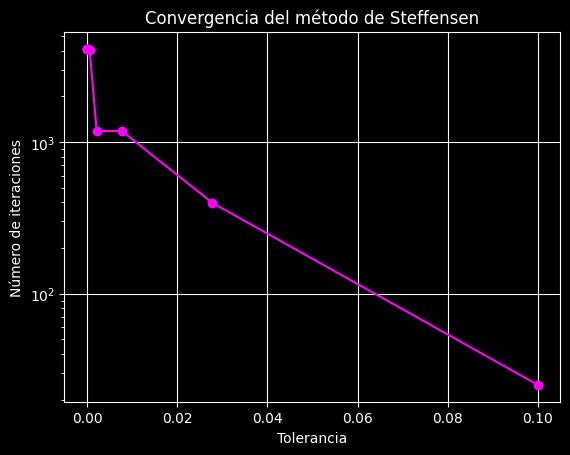

In [26]:
tolerancias = np.logspace(-1, -6, 10)  #pruebo diferentes tolerancia par analizar convergencia
iteraciones = []

for i in tolerancias: #recorro los diferentes valores de tolerancias en la lista anterior
    print(f"Probando con tolerancia: {i}")
    raiz, n = steffensen(fx,0.8,tol=i,maxiter=100)
    iteraciones.append(n)

#grafica para la convergencia
plt.style.use('dark_background')
plt.semilogy(tolerancias, iteraciones, marker='o',color = 'magenta')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones')
plt.title('Convergencia del método de Steffensen')
plt.grid()
plt.show()

Se observa una tendencia decreciente: a medida que se aumenta la tolerancia(menor precision), el número de iteraciones disminuye drásticamente.
sucede entonces que el tener una tolerancia menor, aumenta drasticamente el numero de iteraciones, para valores mayores a 1e-6 colapsa computacionalmente, luego de 15minutos no logrò llegar a un valor, por eso se toman las tolerancias hasta 1e-6

---

#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [9]:
def doblefactorial(n): #funcion para el doble factorial
  if n <= 0:
    return 1
  else:
    resultado = 1
    for i in range(1, n+1,2):
      resultado *= i
    return resultado

In [10]:
def coeficiente_cn(n): #funcion para los coeficientes cn
  cn = (doblefactorial(n)/((2**n)*(factorial(n))))**2
  return cn

In [11]:
def sumatoria(n,theta): #funcion para la sumatoria para hallar el periodo
  for i in range(n+1):
    suma = coeficiente_cn(n)*(np.sin(theta/2)**2*i)
  return suma

def periodo(n,thetha): #funcion para hallar el valor del periodo t
  T0= 2*pi*(sqrt(1.2/9.8))
  T= T0*(1+sumatoria(n,thetha))
  return T

In [13]:
rad90 = np.deg2rad(90)
rad15 = np.deg2rad(15)

T_90 = periodo(3,rad90)
T_15 = periodo(3,rad15)

T_90_real = periodo(10,rad90)
T_15_real = periodo(10,rad15)

#funcion para hallar el error porcentual de los valores calculados
def error_porcentual(valor_real, valor_aproximado):
  error = (abs(valor_real-valor_aproximado)/valor_real)*100
  return error

error90 = error_porcentual(T_90_real,T_90)
error15 = error_porcentual(T_15_real,T_15)

print(f'el valor para 90 grados es {T_90} con un error porcentual de {error90: .4f} %')
print(f'el valor para 15 grados es {T_15} con un error porcentual de {error15: .4f} %')


el valor para 90 grados es 2.2115396066965176 con un error porcentual de  0.5859 %
el valor para 15 grados es 2.1990958209374734 con un error porcentual de  0.0200 %


para angulos muy grandes ya no funciona la aproximacion de pequeñas oscilaciones, mayor a 15 grados se incrementa en buena medida el error, con la aproximacion se tiene un error de practicamente cero al comparar la medida real y la aproximacion.



* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).

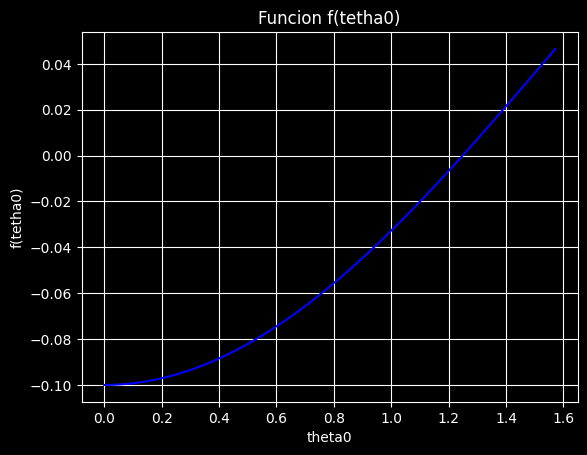

In [29]:
def f(theta0): #funcion para f(tetha0)
  serie = 1
  N = 4
  for n in range(1,N,1):
    serie += sumatoria(n,theta0)
  return serie - 1.10

theta_0= np.linspace(0,pi/2,100)
ftheta0 = f(theta_0)

plt.style.use('dark_background')
plt.plot(theta_0,ftheta0, color='blue')
plt.title('Funcion f(tetha0)')
plt.xlabel('theta0')
plt.ylabel('f(tetha0)')
plt.grid()
plt.show()



In [16]:
#valores para f(tetha0) = 0 usando biseccion y secante
raiz_biseccion_t = bisect(f,0,pi/2)
print(f'Raiz con biseccion: {raiz_biseccion_t}')

raiz_secante_t = newton(f,0.8)
print(f'Raiz usando secante: {raiz_secante_t}')

Raiz con biseccion: 1.2478801754224655
Raiz usando secante: 1.2478801754227087
